# Importing Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
!pip install pytrends
from pytrends.request import TrendReq
from pytrends import dailydata
import json

# -*- coding: utf-8 -*-

Mounted at /content/drive
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=111d1fea5cd8b7a80d6c62548ad87ad155d706e0cd6cc0a85b14fa388de14e26
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy 

# Selecting Quantitative Columns for Clustering

In [ ]:
#Import influencer dataset
influencer_post_metrics = pd.read_csv("drive/Shareddrives/capstone_prayap_nithyara/" + "sponsored_brand_mentions_by_influencer_merge" + ".csv")

In [ ]:
#Select all quantitative columns
influencer_post_metrics_cols_to_cluster = influencer_post_metrics[['Account ID', 'Followers', 'Followees', 'Posts', 'Brand Mentioning Posts', 'Sponsored Brand Mentioning Posts']]
influencer_post_metrics_cols_to_cluster = influencer_post_metrics_cols_to_cluster.set_index('Account ID')
influencer_post_metrics_cols_to_cluster

,Followers,Followees,Posts,Brand Mentioning Posts,Sponsored Brand Mentioning Posts
Account ID,,,,,
fodmap_friendly_eating,11299.0,2609.0,549.0,11.0,3.0
paileaa,12615.0,1207.0,1386.0,65.0,5.0
a12team,1319.0,861.0,405.0,10.0,NaN
ilbulgaro89,1547.0,909.0,1250.0,1.0,1.0
joililikoi,7427.0,1836.0,908.0,12.0,0.0
...,...,...,...,...,...
elena_280614,41870.0,1430.0,1058.0,133.0,2.0
carolefua,11872.0,683.0,125.0,40.0,3.0
castyworld,5645.0,800.0,389.0,13.0,NaN


In [ ]:
#Fill NA with 0
influencer_post_metrics_cols_to_cluster = influencer_post_metrics_cols_to_cluster.fillna(0)

# K Means Clustering

## Original Data

### Run Elbow Method to find ideal K

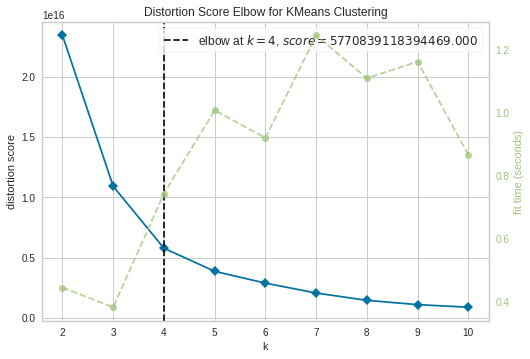

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#Conduct Elbow distortion method to find ideal number of clusters
X = influencer_post_metrics_cols_to_cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X)    
visualizer.show()    

### Run 2-9 Clusters and Calculate Scores

Silhouette Score for k = 2 0.9970556476348574
Davies Bouldin Score for k = 2 0.3519944155362619
Silhouette Score for k = 3 0.9869863887399213
Davies Bouldin Score for k = 3 0.37990942737610395
Silhouette Score for k = 4 0.9752904995525283
Davies Bouldin Score for k = 4 0.3845486093272484
Silhouette Score for k = 5 0.9500742709554632
Davies Bouldin Score for k = 5 0.43037531307428784
Silhouette Score for k = 6 0.9257246537081864
Davies Bouldin Score for k = 6 0.4413182261796584
Silhouette Score for k = 7 0.9269914003911622
Davies Bouldin Score for k = 7 0.40338890613536776
Silhouette Score for k = 8 0.9259952429058611
Davies Bouldin Score for k = 8 0.36715469446593485
Silhouette Score for k = 9 0.9105595858555943
Davies Bouldin Score for k = 9 0.3877544164173106


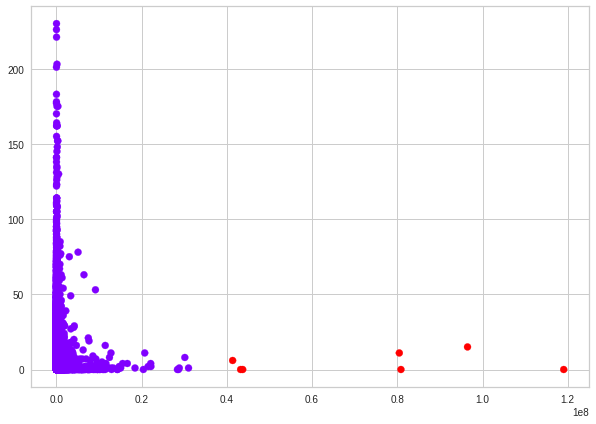

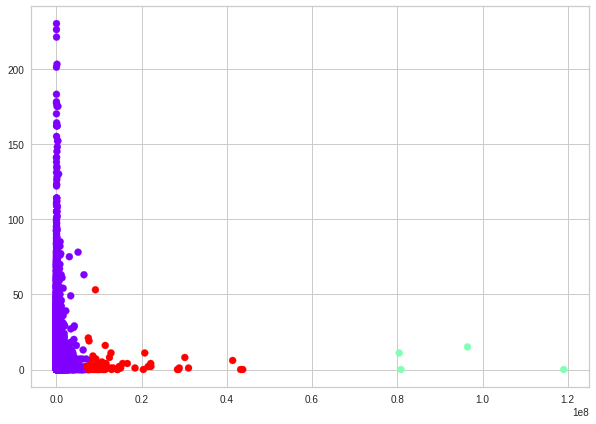

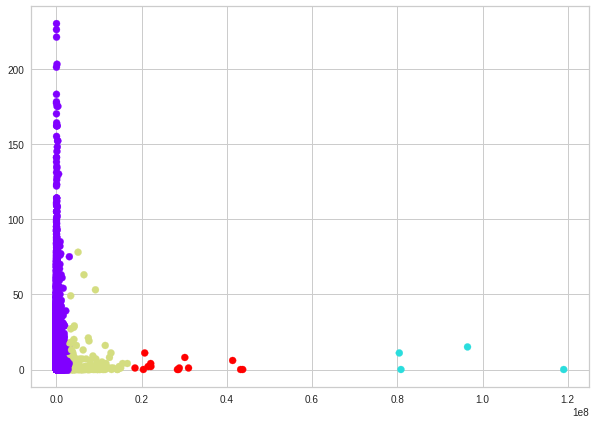

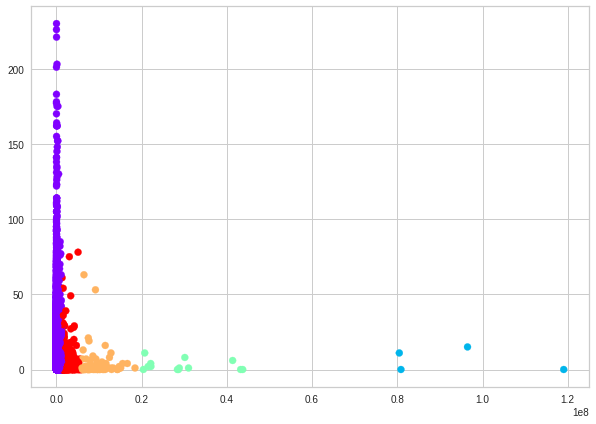

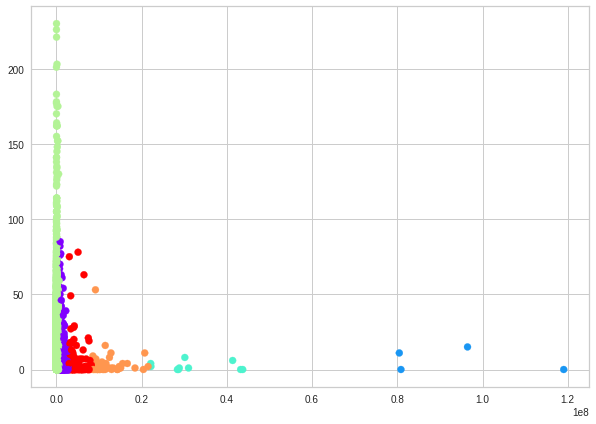

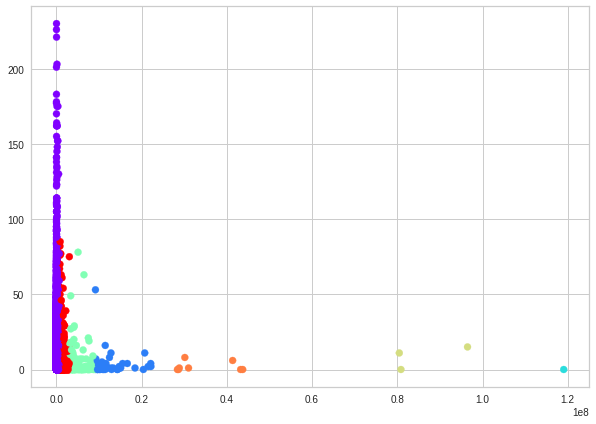

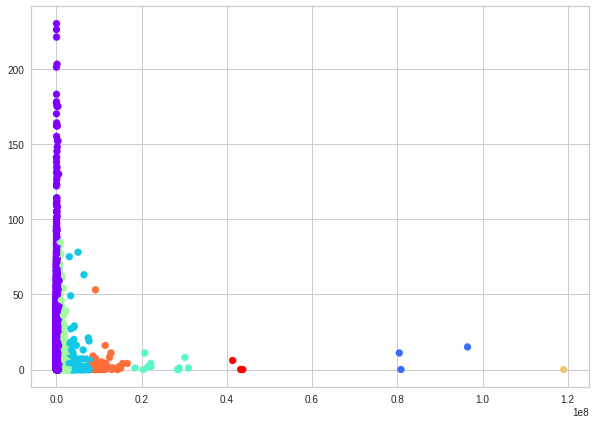

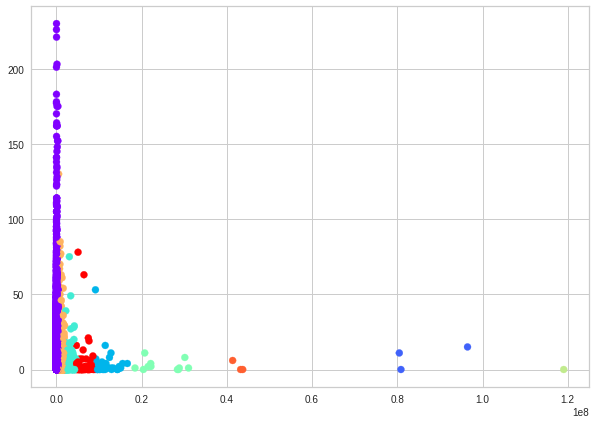

In [ ]:
from sklearn.cluster import KMeans
#Conduct KMeans for 2-9 clusters, plot, and generate scores

X = influencer_post_metrics_cols_to_cluster

for num in range(2,10):
    kmeans = KMeans(n_clusters=num)
    kmeans.fit_predict(X)
    assigning_clusters = kmeans.labels_
    plt.figure(figsize=(10, 7))  
    plt.scatter(influencer_post_metrics_cols_to_cluster['Followers'], influencer_post_metrics_cols_to_cluster['Sponsored Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 
    print("Silhouette Score for k = " + str(num) + " " + str(silhouette_score(X, assigning_clusters)))
    print("Davies Bouldin Score for k = " + str(num) + " " + str(davies_bouldin_score(X, assigning_clusters))) 



### Select k=4 and list out clusters

Cluster 0
['fodmap_friendly_eating', 'paileaa', 'a12team', 'ilbulgaro89', 'joililikoi', 'the.fashion.diet', 'nichi_ila', 'domestic_bliss_squared', 'ashyi', 'alexismwah.jpg', 'wahid.sahil', 'phoebelettice', 'kaelinedwards', 'terumenclova', 'nikki', 'christyrosebud', 'heydylopez_', 'thelivstyle', 'martitastylee', 'maria.chung', '_malinvictoria', 'whatkatiedidnext.sw', 'happeninsintheham', 'lipstickandlogic', 'allaboutvivien', 'krisgianna', 'harryjamesonpt', 'peggylichi', 'theboudoirsecrets', 'diydecormom', 'giovannimastellone', 'centered_by_design', 'xxkellylamich', 'themilkandmoscato', 'keithjoyce', 'welldressedwellness', 'irisbeilin', 'soup_opera', 'kellydemmers', 'luca_ovrezzi', 'jusstine1', 'glitterinclexi', 'vegas.moon', 'regyates', 'how_to_eat', 'thenashypears', 'thebeachmiami', 'themiatowers', 'jorddpaige', 'jakohara', 'clarahemsley', 'taylormadex2', 'insta_crone', 'zahakos', 'zaarachougle', 'arezius', 'diana_naumcevski', 'courtneylynnc', 'atticusthehedgie', 'nicoleslounge', 'luig

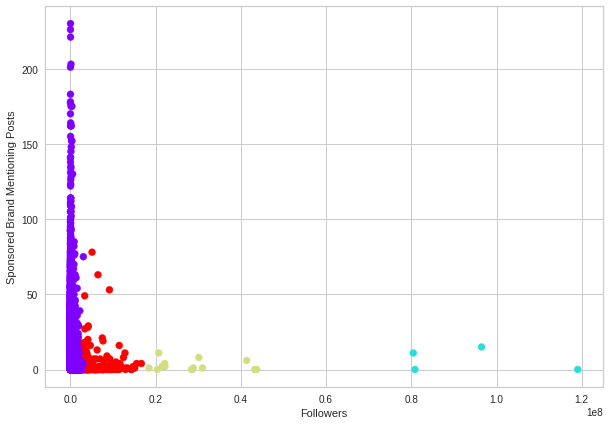

In [ ]:
from numpy.core.multiarray import result_type
X = influencer_post_metrics_cols_to_cluster

#Run KMeans for k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit_predict(X)
assigning_clusters = kmeans.labels_
result = assigning_clusters

#Print each cluster's contents
print("Cluster 0")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 0])
print("Cluster 1")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 1])
print("Cluster 2")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 2])
print("Cluster 3")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 3])

#Plot clusters 
plt.figure(figsize=(10, 7)) 
plt.xlabel('Followers')
plt.ylabel('Sponsored Brand Mentioning Posts')
plt.scatter(X['Followers'], X['Sponsored Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

#Print scores for k=4
print("Silhouette Score for k = 4: " + str(silhouette_score(X, assigning_clusters)))
print("Davies Bouldin Score for k = 4: " + str(davies_bouldin_score(X, assigning_clusters))) 



### Plot charts with clusters

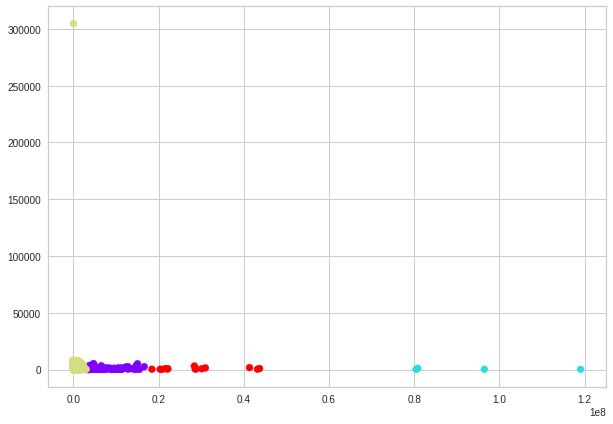

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Followers'], X['Followees'], c=kmeans.labels_, cmap='rainbow') 

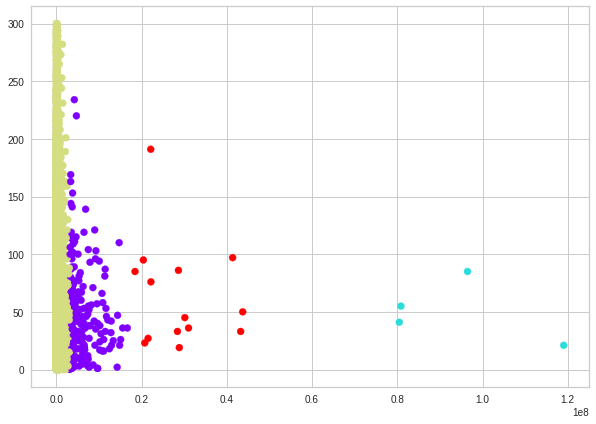

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Followers'], X['Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

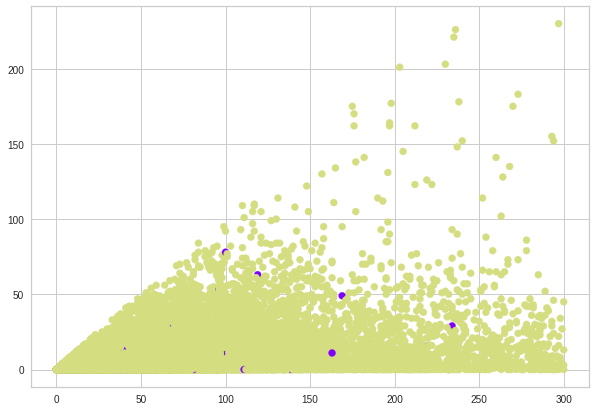

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Brand Mentioning Posts'], X['Sponsored Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

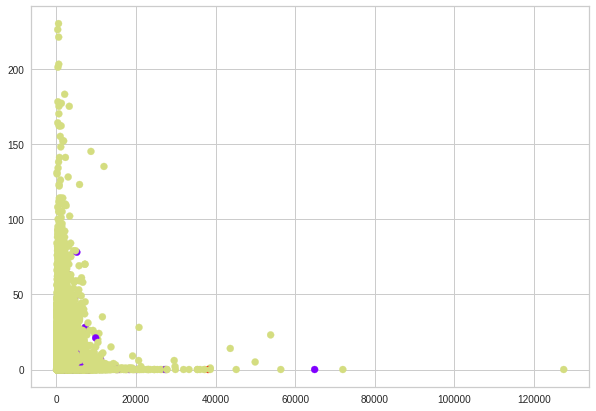

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Posts'], X['Sponsored Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

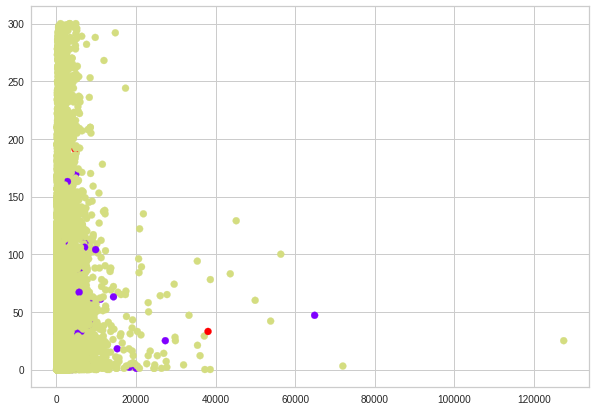

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Posts'], X['Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

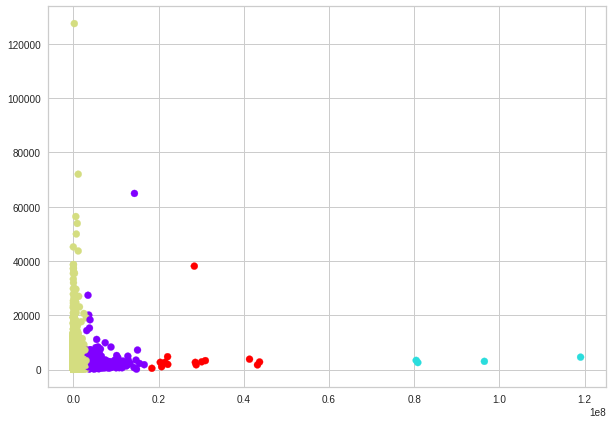

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Followers'], X['Posts'], c=kmeans.labels_, cmap='rainbow') 

## PCA Data

### Run Elbow Method to find ideal K

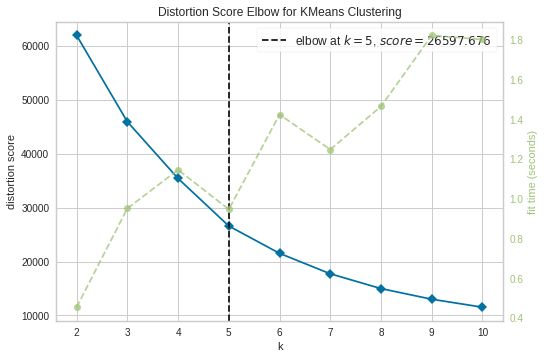

In [ ]:
#Conduct elbow distortion method on reduced data with PCA to find ideal number of clusters
X = influencer_post_metrics_cols_to_cluster
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X_pca)  
visualizer.show()  

### Run 2-9 Clusters and Calculate Scores

Silhouette Score for k = 2 0.6223187130144193
Davies Bouldin Score for k = 2 0.7300881321183017
Silhouette Score for k = 3 0.6232777701902117
Davies Bouldin Score for k = 3 0.6417589426349785
Silhouette Score for k = 4 0.623139151548844
Davies Bouldin Score for k = 4 0.6595899640623861
Silhouette Score for k = 5 0.5349128074114777
Davies Bouldin Score for k = 5 0.6618933990039514
Silhouette Score for k = 6 0.5310114020200748
Davies Bouldin Score for k = 6 0.6633754127236807
Silhouette Score for k = 7 0.4837819209685053
Davies Bouldin Score for k = 7 0.6701744102160196
Silhouette Score for k = 8 0.4702572758606566
Davies Bouldin Score for k = 8 0.6842592250217246
Silhouette Score for k = 9 0.4724502422449949
Davies Bouldin Score for k = 9 0.6815283384297677


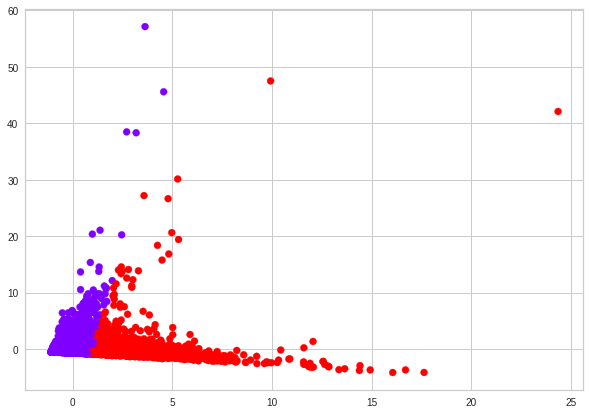

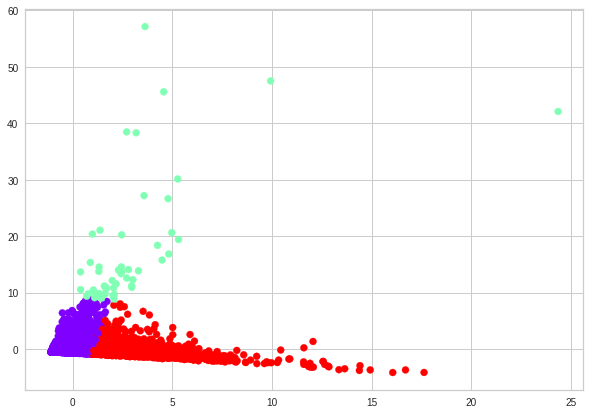

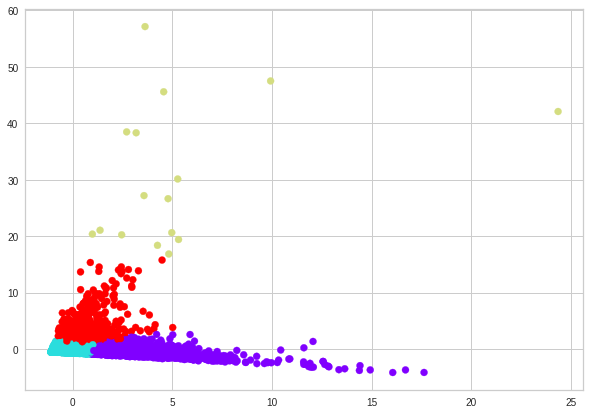

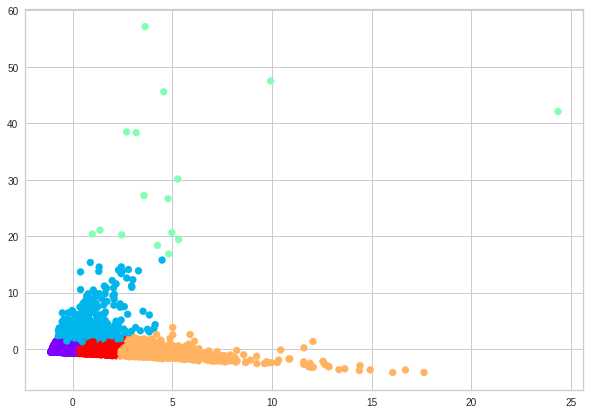

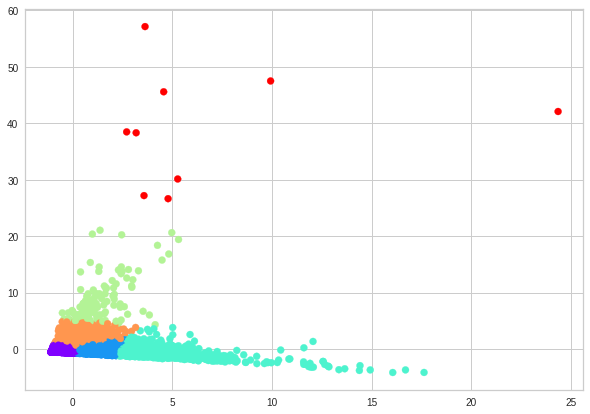

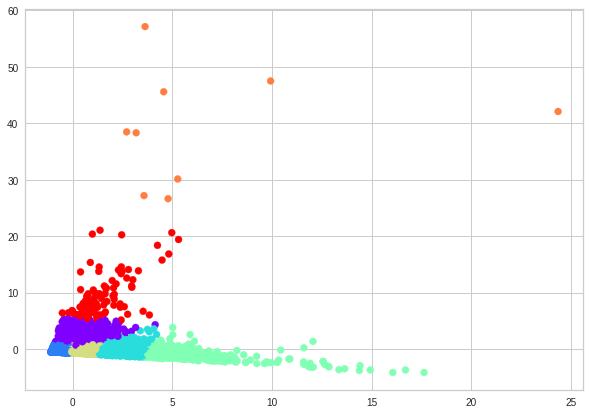

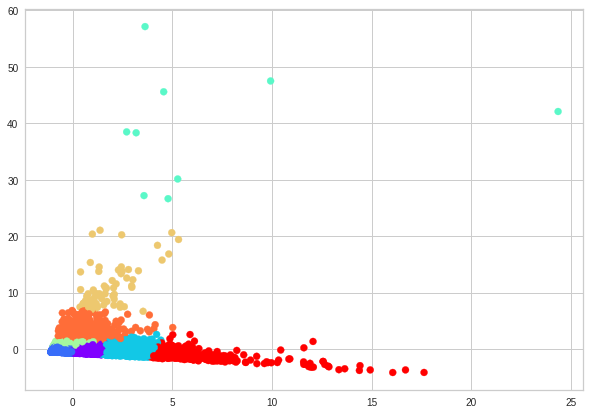

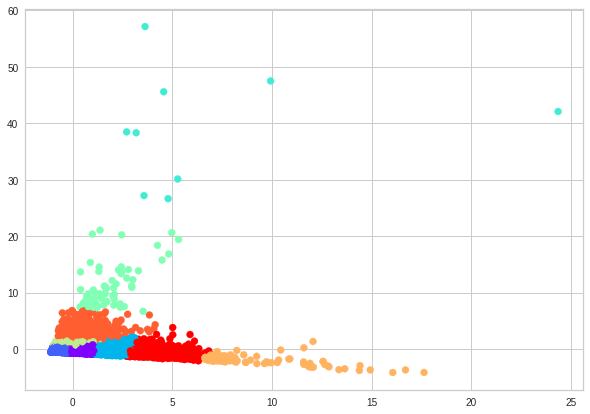

In [ ]:
#Conduct KMeans clustering on reduced data with PCA, plot, and generate scores
X = influencer_post_metrics_cols_to_cluster
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

for num in range(2,10):
    kmeans = KMeans(n_clusters=num)
    kmeans.fit_predict(X_pca)
    assigning_clusters = kmeans.labels_
    plt.figure(figsize=(10, 7))  
    plt.scatter(X_pca[0], X_pca[1], c=kmeans.labels_, cmap='rainbow') 
    print("Silhouette Score for k = " + str(num) + " " + str(silhouette_score(X_pca, assigning_clusters)))
    print("Davies Bouldin Score for k = " + str(num) + " " + str(davies_bouldin_score(X_pca, assigning_clusters))) 



### Select k=4 and list out clusters

Cluster 0
['fodmap_friendly_eating', 'paileaa', 'a12team', 'ilbulgaro89', 'joililikoi', 'the.fashion.diet', 'nichi_ila', 'domestic_bliss_squared', 'ashyi', 'alexismwah.jpg', 'phoebelettice', 'kaelinedwards', 'terumenclova', 'nikki', 'christyrosebud', 'martitastylee', 'maria.chung', '_malinvictoria', 'happeninsintheham', 'lipstickandlogic', 'allaboutvivien', 'krisgianna', 'harryjamesonpt', 'peggylichi', 'theboudoirsecrets', 'giovannimastellone', 'centered_by_design', 'xxkellylamich', 'themilkandmoscato', 'keithjoyce', 'welldressedwellness', 'irisbeilin', 'soup_opera', 'kellydemmers', 'jusstine1', 'glitterinclexi', 'vegas.moon', 'regyates', 'how_to_eat', 'thenashypears', 'jorddpaige', 'jakohara', 'clarahemsley', 'insta_crone', 'zahakos', 'zaarachougle', 'diana_naumcevski', 'courtneylynnc', 'atticusthehedgie', 'luigisutera12', 'bbaldz', 'lifeasmum_blog', 'whitesunmusic', 'l.hof', 'geeluzz', 'geoffreyandgrace', 'randaderkson', 'leticiawalantumba', 'glennparryphoto', 'yummay_eats', 'magdale

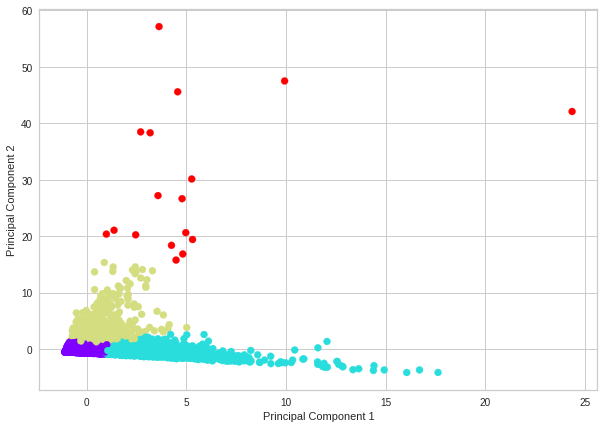

In [ ]:
from numpy.core.multiarray import result_type
X = influencer_post_metrics_cols_to_cluster

#Conduct PCA on data
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

#Run KMeans for k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit_predict(X_pca)
assigning_clusters = kmeans.labels_
result = assigning_clusters

#Print each cluster's contents
print("Cluster 0")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 0])
print("Cluster 1")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 1])
print("Cluster 2")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 2])
print("Cluster 3")
print([X.index[num] for num in range(len(X)) if assigning_clusters[num] == 3])

#Print each cluster's contents
plt.figure(figsize=(10, 7)) 
plt.scatter(X_pca[0], X_pca[1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#Print scores for k=4
print("Silhouette Score for k = 4: " + str(silhouette_score(X_pca, assigning_clusters)))
print("Davies Bouldin Score for k = 4: " + str(davies_bouldin_score(X_pca, assigning_clusters))) 



### Plot charts with clusters

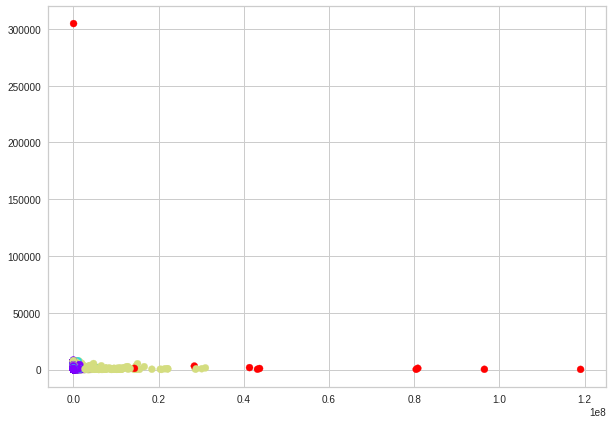

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Followers'], X['Followees'], c=kmeans.labels_, cmap='rainbow') 

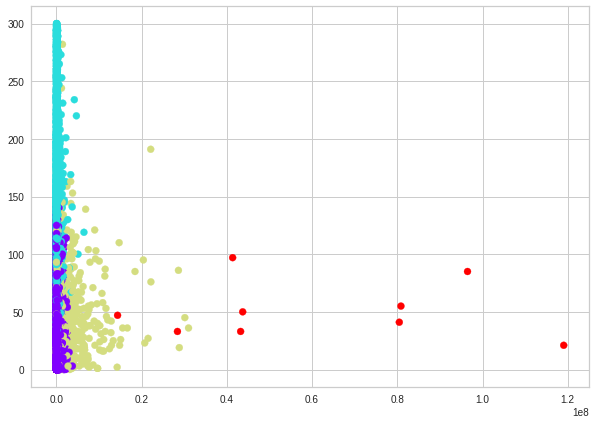

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Followers'], X['Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow')

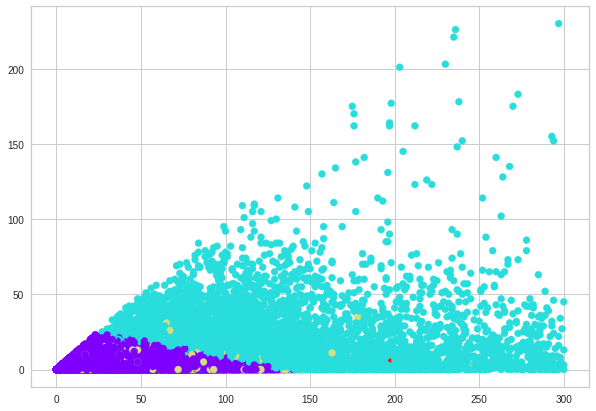

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Brand Mentioning Posts'], X['Sponsored Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

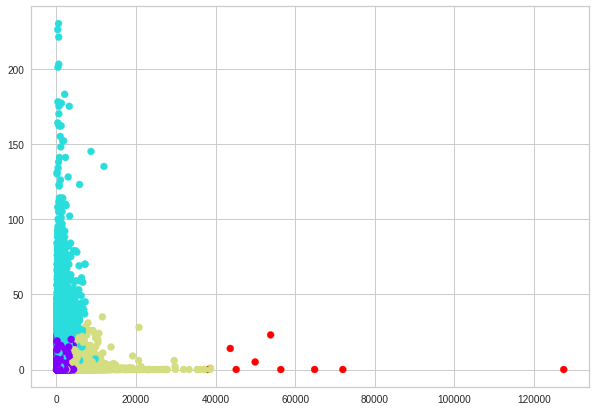

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Posts'], X['Sponsored Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 

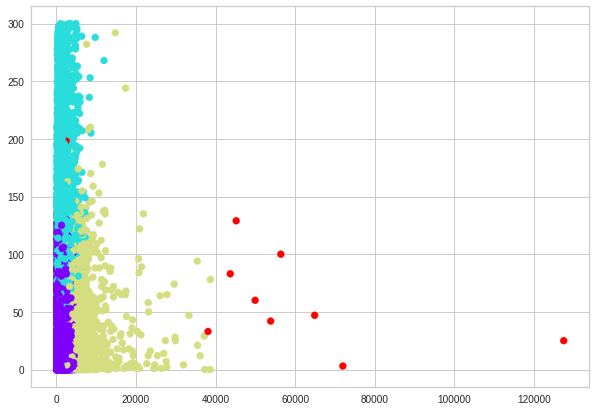

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.scatter(X['Posts'], X['Brand Mentioning Posts'], c=kmeans.labels_, cmap='rainbow') 